# Python으로 데이터베이스 연결하기
## 파이썬 가상 환경에 플라스크 설치

In [ ]:
%mkdir venvs
%cd .\venvs\
%python -m venv dataproject
%cd \dataproject\Scripts
%activate

## 커널 설치

In [ ]:
# activate 된 상태
%pip install ipykernel

## 커널 등록

In [ ]:
%python -m ipykernel install --user --name dataproject --display-name "Python (dataproject)"

## psycopg2 설치

In [ ]:
%pip install psycopg2-binary

## 데이터베이스 연결

In [13]:
import psycopg2

# 데이터베이스 연결 설정
conn = psycopg2.connect(
    host="localhost", #데이터베이스 호스트 이름
    port=5432,
    database="postgres", #데이터베이스 이름
    user="postgres", #데이터베이스 사용자 이름
    password="123" #데이터베이스 비밀번호
)

# 커서 생성
cur = conn.cursor()

## 데이터 조회

In [20]:
cur.execute("SELECT * FROM user_info")
rows = cur.fetchall()

for row in rows:
    print(row)

('jimin', '박지민', '9510131234567', 'SK', '01011111111')
('jungkuk', '전정국', '9709011234567', 'KT', '01022222222')
('sugar', '민윤기', '9309011234567', 'LG', '01033333333')
('chris', '인선미', '1111111111111', 'SK', '01044444444')
('chris2', '김곽객', '9303132984027', 'SK', '01048484848')
('chris4', '곽객객', '9510132222222', 'KT', '01055555555')


## INSERT

In [8]:
query = "INSERT INTO user_info VALUES ('chris2', '김객곽', '9303132984027', 'SK', '01048484848');"
cur.execute(query)
conn.commit()

### 안전한 방법

In [16]:
query = "INSERT INTO user_info VALUES (%s, %s, %s, %s, %s);"

In [19]:
cur.execute(query, ('chris4', '곽객객', '9510132222222', 'KT', '01055555555'))

### 에러날시

In [27]:
conn.rollback()

## Update

In [10]:
query = "UPDATE user_info SET user_name = '김곽객' WHERE user_name = '김객곽';"
try:
    cur.execute(query)
    conn.commit()
except Exception as e:
    conn.rollback()
    print(f"Error: {e}")

## DB 연결 해제

In [12]:
cur.close()
conn.close()

## 템플릿

In [ ]:
query =  "INSERT INTO user_info VALUES (%s, %s, %s, %s, %s);"
try:
    cur.execute(query, ('chris4', '곽객객', '9510132222222', 'KT', '01055555555'))
    conn.commit()
except Exception as e:
    conn.rollback()
    print(f"Error: {e}")

# PostgreSQL에 데이터 관리하기

In [15]:
import pandas as pd

### 데이터 가져오기

In [21]:
cur.execute("SELECT * FROM fms.chick_info")
results = cur.fetchall()
col_names = [desc[0] for desc in cur.description]
df = pd.DataFrame(results, columns=col_names)

In [22]:
df

,chick_no,breeds,gender,hatchday,egg_weight,vaccination1,vaccination2,farm
0,A2510001,C1,M,2025-01-01,65,1,1,A
1,A2510002,C1,M,2025-01-01,62,1,1,A
2,A2510003,C1,M,2025-01-01,67,1,1,A
3,A2500004,C1,F,2025-01-01,69,1,1,A
4,A2500005,C1,F,2025-01-01,70,1,1,A
5,A2510006,C2,M,2025-01-01,68,1,1,A
6,A2510007,C2,M,2025-01-01,66,0,1,A
7,A2510008,C2,M,2025-01-01,69,1,0,A
8,A2500009,C1,F,2025-01-02,66,1,1,A
9,A2500010,C1,F,2025-01-02,70,1,0,A


In [ ]:
total_result = pd.read_sql_query("SELECT * FROM fms.total_result", conn)

C:\Users\EL097\AppData\Local\Temp\ipykernel_16004\3872673261.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_result = pd.read_sql_query("SELECT * FROM fms.total_result", conn)


In [24]:
total_result

,육계번호,품종,종란무게,체온,호흡수,호수,부적합여부,주문번호,고객사,도착일,도착지
0,A2510001,Cornish,65g,41.2℃,60cnt/min,11호,Pass,B001,BBQUEEN,2025-02-05,부산
1,A2510002,Cornish,62g,41.7℃,63cnt/min,12호,Pass,M002,MAXCANA,2025-02-04,당진
2,A2510003,Cornish,67g,40.6℃,63cnt/min,12호,Pass,M002,MAXCANA,2025-02-04,당진
3,A2500004,Cornish,69g,41.6℃,63cnt/min,12호,Pass,M001,MAXCANA,2025-02-05,대전
4,A2500005,Cornish,70g,41.5℃,64cnt/min,12호,Pass,M001,MAXCANA,2025-02-05,대전
5,A2510006,Cochin,68g,40.9℃,64cnt/min,11호,Pass,B002,BBQUEEN,2025-02-05,울산
6,A2510007,Cochin,66g,40.6℃,66cnt/min,11호,Pass,B002,BBQUEEN,2025-02-05,울산
7,A2510008,Cochin,69g,41.7℃,65cnt/min,12호,Pass,M002,MAXCANA,2025-02-04,당진
8,A2500009,Cornish,66g,41.6℃,67cnt/min,12호,Pass,M001,MAXCANA,2025-02-05,대전
9,A2500010,Cornish,70g,41.0℃,61cnt/min,11호,Pass,B001,BBQUEEN,2025-02-05,부산


### 품종별 무게 데이터 시각화

#### 데이터 가져오기

In [40]:
query = "SELECT c.code_desc, b.raw_weight FROM fms.chick_info a, fms.prod_result b, fms.master_code c WHERE a.chick_no = b.chick_no and a.breeds = c.code"
try:
    cur.execute(query)
except Exception as e:
    conn.rollback()
    print(f"Error: {e}")
results = cur.fetchall()
col_names = [desc[0] for desc in cur.description]
df = pd.DataFrame(results, columns=col_names)

#### 시각화

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'


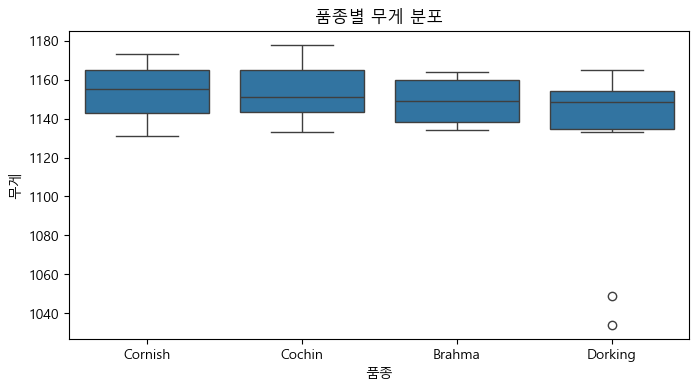

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='code_desc',
    y='raw_weight',
    data=df
)

plt.xlabel('품종')
plt.ylabel('무게')
plt.title('품종별 무게 분포')

plt.show()